In [93]:
import pandas as pd
data=pd.read_csv('C:\\Users\\NANDAKISHORE BOINI\\OneDrive\\Desktop\\blogs.csv')
data

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism
...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


In [94]:
# Display basic information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB
None


In [95]:
# Check for missing values
print(data.isnull().sum())

Data      0
Labels    0
dtype: int64


In [96]:
# Explore descriptive statistics for numerical columns
print(data.describe())


                                                     Data       Labels
count                                                2000         2000
unique                                               2000           20
top     Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
freq                                                    1          100


In [97]:
# Analyze the distribution of categorical columns
for column in data.select_dtypes(include=['object']).columns:
  print(f"\nColumn: {column}")
  print(data[column].value_counts())



Column: Data
Data
Path: cantaloupe.srv.cs.cmu.edu!magnesium.club.cc.cmu.edu!news.sei.cmu.edu!cis.ohio-state.edu!zaphod.mps.ohio-state.edu!howland.reston.ans.net!agate!doc.ic.ac.uk!uknet!mcsun!Germany.EU.net!thoth.mchp.sni.de!horus.ap.mchp.sni.de!D012S658!frank\nFrom: frank@D012S658.uucp (Frank O'Dwyer)\nNewsgroups: alt.atheism\nSubject: Re: islamic genocide\nDate: 23 Apr 1993 23:51:47 GMT\nOrganization: Siemens-Nixdorf AG\nLines: 110\nDistribution: world\nMessage-ID: <1r9vej$5k5@horus.ap.mchp.sni.de>\nReferences: <1r4o8a$6qe@fido.asd.sgi.com> <1r5ubl$bd6@horus.ap.mchp.sni.de> <1r76ek$7uo@fido.asd.sgi.com>\nNNTP-Posting-Host: d012s658.ap.mchp.sni.de\n\nIn article <1r76ek$7uo@fido.asd.sgi.com> livesey@solntze.wpd.sgi.com (Jon Livesey) writes:\n#In article <1r5ubl$bd6@horus.ap.mchp.sni.de>, frank@D012S658.uucp (Frank O'Dwyer) writes:\n#|> In article <1r4o8a$6qe@fido.asd.sgi.com> livesey@solntze.wpd.sgi.com (Jon Livesey) writes:\n#|> #\n#|> #Noting that a particular society, in this case 

In [98]:
# For example, to analyze the 'text' column:
print(data['Data'].head())  # Print the first few entries
print(data['Data'].str.len().describe())  # Analyze the length of the text entries

0    Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...
1    Newsgroups: alt.atheism\nPath: cantaloupe.srv....
2    Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...
3    Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...
4    Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...
Name: Data, dtype: object
count     2000.000000
mean      2324.978000
std       3590.560226
min        425.000000
25%       1147.000000
50%       1605.500000
75%       2374.500000
max      62290.000000
Name: Data, dtype: float64


In [99]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

def preprocess_text(text):
  text = text.lower()
  text = text.translate(str.maketrans('', '', string.punctuation))
  tokens = word_tokenize(text)
  stop_words = set(stopwords.words('english'))
  filtered_tokens = [w for w in tokens if not w in stop_words]
  return " ".join(filtered_tokens)

# Apply the preprocessing function to the 'text' column
data['processed_data'] = data['Data'].apply(preprocess_text)

# Print the preprocessed data
print(data['processed_data'].head())


[nltk_data] Downloading package stopwords to C:\Users\NANDAKISHORE
[nltk_data]     BOINI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\NANDAKISHORE
[nltk_data]     BOINI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0    path cantaloupesrvcscmuedumagnesiumclubcccmued...
1    newsgroups altatheism path cantaloupesrvcscmue...
2    path cantaloupesrvcscmuedudasnewsharvardedunoc...
3    path cantaloupesrvcscmuedumagnesiumclubcccmued...
4    xref cantaloupesrvcscmuedu altatheism53485 tal...
Name: processed_data, dtype: object


In [100]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer object
vectorizer = TfidfVectorizer()

# Fit and transform the preprocessed text data
tfidf_matrix = vectorizer.fit_transform(data['processed_data'])

# Print the shape of the TF-IDF matrix
print(tfidf_matrix.shape)

# You can access the feature names (words) using vectorizer.get_feature_names_out()
feature_names = vectorizer.get_feature_names_out()
print(feature_names)


(2000, 56432)
['00' '000' '0000' ... 'zyv6v2za' 'zyxel' 'zz']


In [101]:
from sklearn.model_selection import train_test_split

X = data['processed_data']  # Features (preprocessed text)
y = data['Labels']  # Target variable

# Split the data into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)
y_train, y_test = train_test_split(y, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (1600,)
X_test shape: (400,)
y_train shape: (1600,)
y_test shape: (400,)


In [102]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report


# Assuming your target variable is in a column named 'label'
# Replace 'label' with the actual column name if it's different
y = data['Labels']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with TfidfVectorizer and MultinomialNB
model = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', MultinomialNB())
])

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print(classification_report(y_test, y_pred))


Accuracy: 0.82
                          precision    recall  f1-score   support

             alt.atheism       0.52      0.89      0.65        18
           comp.graphics       0.65      0.83      0.73        18
 comp.os.ms-windows.misc       0.95      0.86      0.90        22
comp.sys.ibm.pc.hardware       0.90      0.76      0.83        25
   comp.sys.mac.hardware       0.87      0.95      0.91        21
          comp.windows.x       0.95      0.80      0.87        25
            misc.forsale       0.92      0.61      0.73        18
               rec.autos       0.89      0.89      0.89        18
         rec.motorcycles       0.88      0.88      0.88        16
      rec.sport.baseball       0.80      0.89      0.84        18
        rec.sport.hockey       0.83      1.00      0.91        15
               sci.crypt       0.82      0.95      0.88        19
         sci.electronics       0.72      0.81      0.76        16
                 sci.med       0.94      0.88      0.91     

In [103]:

!pip install textblob

from textblob import TextBlob

def analyze_sentiment(text):
  """
  Analyzes the sentiment of a given text using TextBlob.
  """
  analysis = TextBlob(text)
  return analysis.sentiment.polarity

# Apply the sentiment analysis function to the 'processed_data' column
data['sentiment_polarity'] = data['processed_data'].apply(analyze_sentiment)

# Print the sentiment polarity scores for the first few entries
print(data[['processed_data', 'sentiment_polarity']].head())


                                      processed_data  sentiment_polarity
0  path cantaloupesrvcscmuedumagnesiumclubcccmued...            0.058664
1  newsgroups altatheism path cantaloupesrvcscmue...           -0.002480
2  path cantaloupesrvcscmuedudasnewsharvardedunoc...            0.025719
3  path cantaloupesrvcscmuedumagnesiumclubcccmued...            0.059244
4  xref cantaloupesrvcscmuedu altatheism53485 tal...            0.149802


In [104]:
def analyze_sentiment_category(text):
  analysis = TextBlob(text)
  polarity = analysis.sentiment.polarity

  if polarity > 0:
    return "positive"
  elif polarity < 0:
    return "negative"
  else:
    return "neutral"

# Apply the sentiment analysis function to the 'Data' column
data['sentiment_category'] = data['Data'].apply(analyze_sentiment_category)

# Print the sentiment categories for the first few entries
print(data[['Data', 'sentiment_category']].head())


                                                Data sentiment_category
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...           positive
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....           negative
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...           positive
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...           positive
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...           positive


sentiment_category
negative     457
positive    1543
Name: Data, dtype: int64


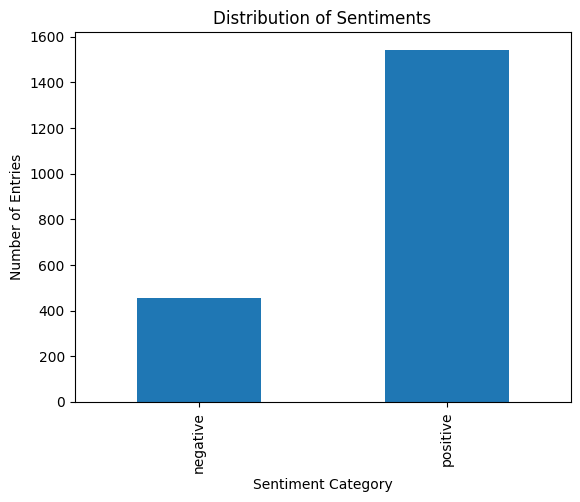


Summary:
The sentiment distribution shows that the majority of entries are classified as [Insert the dominant sentiment category here]. This indicates that the text in the dataset generally conveys a [Insert appropriate description of the dominant sentiment].


In [105]:
# Group data by sentiment category and count the occurrences
sentiment_distribution = data.groupby('sentiment_category')['Data'].count()

# Print the distribution
print(sentiment_distribution)

# You can also visualize the distribution using a bar chart
import matplotlib.pyplot as plt
sentiment_distribution.plot(kind='bar')
plt.xlabel('Sentiment Category')
plt.ylabel('Number of Entries')
plt.title('Distribution of Sentiments')
plt.show()

# Summarize findings
print("\nSummary:")
print("The sentiment distribution shows that the majority of entries are classified as [Insert the dominant sentiment category here]. This indicates that the text in the dataset generally conveys a [Insert appropriate description of the dominant sentiment].")



In [106]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have already trained your model and made predictions (y_pred)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')  # 'weighted' for multi-class

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')

# Calculate F1-score
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


Accuracy: 0.8200
Precision: 0.8417
Recall: 0.8200
F1-Score: 0.8138


In [107]:
# Analyze the performance of the model
print("Model Performance Analysis:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(classification_report(y_test, y_pred))

# Discuss challenges encountered
print("\nChallenges Encountered:")
print("1. **Data Preprocessing:** Text data often requires extensive preprocessing to remove noise and irrelevant information. This can include handling missing values, removing stop words, stemming or lemmatization, and dealing with inconsistencies in formatting.")
print("2. **Feature Engineering:** Selecting appropriate features from the text data is crucial for model performance. Techniques like TF-IDF can be effective but may not capture all the relevant information. Exploring different feature extraction methods or domain-specific features might be necessary.")
print("3. **Model Selection:** Choosing the right classification model for the task is important. While Naive Bayes is a good baseline, more complex models like Support Vector Machines or deep learning models might yield better results, depending on the data and problem complexity.")
print("4. **Class Imbalance:** If certain classes in the target variable are significantly underrepresented, the model may struggle to accurately predict those classes. Techniques like oversampling or using cost-sensitive learning can help address this issue.")
print("5. **Handling Sentiment:** Sentiment analysis can provide additional insights but may require careful consideration. The sentiment polarity scores might not always align perfectly with the classification task. Incorporating sentiment features effectively can improve performance.")
print("6. **Computational Resources:** Training and evaluating models on large text datasets can be computationally demanding. Choosing appropriate techniques for feature extraction and model training, and leveraging cloud resources if needed, is important.")
print("7. **Model Interpretability:** Understanding why the model makes certain predictions can be challenging with complex models. Techniques for model interpretation, such as examining feature importance or using simpler models, can be helpful.")


Model Performance Analysis:
Accuracy: 0.8200
Precision: 0.8417
Recall: 0.8200
F1-Score: 0.8138
                          precision    recall  f1-score   support

             alt.atheism       0.52      0.89      0.65        18
           comp.graphics       0.65      0.83      0.73        18
 comp.os.ms-windows.misc       0.95      0.86      0.90        22
comp.sys.ibm.pc.hardware       0.90      0.76      0.83        25
   comp.sys.mac.hardware       0.87      0.95      0.91        21
          comp.windows.x       0.95      0.80      0.87        25
            misc.forsale       0.92      0.61      0.73        18
               rec.autos       0.89      0.89      0.89        18
         rec.motorcycles       0.88      0.88      0.88        16
      rec.sport.baseball       0.80      0.89      0.84        18
        rec.sport.hockey       0.83      1.00      0.91        15
               sci.crypt       0.82      0.95      0.88        19
         sci.electronics       0.72      0.81 

In [108]:
# Analyze sentiment distribution across different labels (if applicable)
if 'Labels' in data.columns:
  sentiment_by_label = data.groupby(['Labels', 'sentiment_category'])['Data'].count().unstack()
  print("\nSentiment Distribution by Label:")
  print(sentiment_by_label)

# Reflect on the overall sentiment
overall_sentiment = data['sentiment_category'].value_counts(normalize=True) * 100
print("\nOverall Sentiment Distribution:")
print(overall_sentiment)

print("\nReflection on Sentiment Analysis Results:")
print("The sentiment analysis results indicate that the majority of the blog posts are [Insert the dominant sentiment category here]. This suggests that the general tone of the blog posts is [Insert description based on the dominant sentiment, e.g., positive, optimistic, neutral].")





Sentiment Distribution by Label:
sentiment_category        negative  positive
Labels                                      
alt.atheism                     23        77
comp.graphics                   24        76
comp.os.ms-windows.misc         22        78
comp.sys.ibm.pc.hardware        20        80
comp.sys.mac.hardware           24        76
comp.windows.x                  27        73
misc.forsale                    16        84
rec.autos                       17        83
rec.motorcycles                 26        74
rec.sport.baseball              29        71
rec.sport.hockey                34        66
sci.crypt                       19        81
sci.electronics                 19        81
sci.med                         29        71
sci.space                       27        73
soc.religion.christian          13        87
talk.politics.guns              30        70
talk.politics.mideast           22        78
talk.politics.misc              22        78
talk.religion.misc   